In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
"""
    I am running the notebook on local jupyter notebook instance.
    The data has been downloaded from s3 bucket.
    The model is trained on local CPU.
"""
df = pd.read_csv('ramen-ratings.csv')

In [98]:
!pip install sentence-transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [99]:
df.describe(include='all')

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
count,2580.000000,2580,2580,2578,2580,2580,41
unique,NaN,355,2413,7,38,51,38
top,NaN,Nissin,Beef,Pack,Japan,4,\n
freq,NaN,381,7,1531,352,384,4
mean,1290.500000,NaN,NaN,NaN,NaN,NaN,NaN
std,744.926171,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,645.750000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1290.500000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1935.250000,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
"""
    Out of 2580 values we only have 41 values for Top Ten feature.
    So its fine to drop it.
"""

df.drop(columns=['Top Ten'], inplace=True)

In [101]:
df.columns

Index(['Review #', 'Brand', 'Variety', 'Style', 'Country', 'Stars'], dtype='object')

In [102]:
df = df.set_index('Review #')

In [103]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
sentence_embeddings = model.encode(df['Variety'].tolist())

variety_embeddings_df = pd.DataFrame(sentence_embeddings,
                                     columns=[f'variety_emb_{i}' for i in range(sentence_embeddings.shape[1])])

df = df.drop(columns=['Variety'])
df = pd.concat([df.reset_index(drop=True), variety_embeddings_df], axis=1)

In [104]:
df

,Brand,Style,Country,Stars,variety_emb_0,variety_emb_1,variety_emb_2,variety_emb_3,variety_emb_4,variety_emb_5,...,variety_emb_374,variety_emb_375,variety_emb_376,variety_emb_377,variety_emb_378,variety_emb_379,variety_emb_380,variety_emb_381,variety_emb_382,variety_emb_383
0,New Touch,Cup,Japan,3.75,0.008211,0.040726,-0.012296,-0.030254,-0.087251,-0.000035,...,-0.009106,-0.038584,0.068323,0.025785,-0.020410,-0.013544,0.041941,-0.001203,-0.006340,-0.047362
1,Just Way,Pack,Taiwan,1,-0.145963,-0.049212,-0.021097,0.052561,-0.039781,0.014862,...,-0.048551,-0.067750,0.043449,-0.010555,0.031077,-0.070400,0.021824,0.062235,-0.045363,0.100652
2,Nissin,Cup,USA,2.25,-0.121339,-0.032021,-0.038093,0.049455,0.020214,0.037210,...,-0.003368,0.059473,0.032751,0.010563,-0.029418,-0.015093,-0.107990,0.049097,0.088203,0.043062
3,Wei Lih,Pack,Taiwan,2.75,-0.055996,-0.031858,-0.009268,-0.045139,-0.043832,-0.008629,...,0.068682,-0.035058,-0.052412,-0.032244,0.037478,-0.004841,-0.044936,-0.003457,0.023023,-0.009150
4,Ching's Secret,Pack,India,3.75,-0.017170,0.015357,-0.006900,0.026682,-0.026135,0.023832,...,0.001207,-0.018672,-0.020922,-0.047290,0.001673,0.064595,0.106685,-0.008627,-0.025232,0.025313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,Vifon,Bowl,Vietnam,3.5,-0.079895,0.022555,0.012004,0.033568,-0.070995,-0.001656,...,-0.014823,0.053413,-0.000696,-0.023479,0.035455,-0.013986,0.031379,0.096622,-0.023745,0.060604
2576,Wai Wai,Pack,Thailand,1,-0.139653,-0.025586,-0.002901,0.099757,-0.070216,-0.014625,...,-0.047412,0.072332,0.019349,-0.029117,0.063175,0.001268,-0.013387,0.015482,-0.000821,0.066207
2577,Wai Wai,Pack,Thailand,2,-0.126256,0.032873,0.000950,-0.077178,-0.063134,-0.028888,...,-0.039208,-0.014450,0.026240,0.060703,0.000836,-0.004264,-0.006572,0.015426,0.054819,0.006474
2578,Wai Wai,Pack,Thailand,2,-0.127946,-0.023724,0.013316,-0.058578,-0.044750,0.036498,...,-0.011772,-0.012394,0.021764,0.025045,-0.006425,-0.045526,-0.024698,0.009744,0.055190,-0.048107


In [105]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['Country', 'Style']

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_array = ohe.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(categorical_cols))

encoded_df.index = df.index

df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

In [106]:
df

,Brand,Stars,variety_emb_0,variety_emb_1,variety_emb_2,variety_emb_3,variety_emb_4,variety_emb_5,variety_emb_6,variety_emb_7,...,Country_United States,Country_Vietnam,Style_Bar,Style_Bowl,Style_Box,Style_Can,Style_Cup,Style_Pack,Style_Tray,Style_nan
0,New Touch,3.75,0.008211,0.040726,-0.012296,-0.030254,-0.087251,-0.000035,0.117529,-0.032520,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Just Way,1,-0.145963,-0.049212,-0.021097,0.052561,-0.039781,0.014862,0.056952,-0.033205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Nissin,2.25,-0.121339,-0.032021,-0.038093,0.049455,0.020214,0.037210,0.091100,0.021062,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Wei Lih,2.75,-0.055996,-0.031858,-0.009268,-0.045139,-0.043832,-0.008629,0.132931,-0.015871,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Ching's Secret,3.75,-0.017170,0.015357,-0.006900,0.026682,-0.026135,0.023832,0.103167,-0.015255,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,Vifon,3.5,-0.079895,0.022555,0.012004,0.033568,-0.070995,-0.001656,0.087798,-0.051410,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2576,Wai Wai,1,-0.139653,-0.025586,-0.002901,0.099757,-0.070216,-0.014625,0.101016,-0.010362,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2577,Wai Wai,2,-0.126256,0.032873,0.000950,-0.077178,-0.063134,-0.028888,0.070675,-0.038352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2578,Wai Wai,2,-0.127946,-0.023724,0.013316,-0.058578,-0.044750,0.036498,0.036504,-0.012537,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [107]:
top_k = 30
top_brands = df['Brand'].value_counts().nlargest(top_k).index

df['Brand_reduced'] = df['Brand'].where(df['Brand'].isin(top_brands), 'Other')

ohe = OneHotEncoder(sparse_output=False, dtype=int, handle_unknown='ignore')

brand_encoded = ohe.fit_transform(df[['Brand_reduced']])

brand_encoded_df = pd.DataFrame(brand_encoded, columns=ohe.get_feature_names_out(['Brand_reduced']))

brand_encoded_df.index = df.index

df = df.drop(columns=['Brand', 'Brand_reduced'])
df = pd.concat([df, brand_encoded_df], axis=1)

In [108]:
df

,Stars,variety_emb_0,variety_emb_1,variety_emb_2,variety_emb_3,variety_emb_4,variety_emb_5,variety_emb_6,variety_emb_7,variety_emb_8,...,Brand_reduced_Other,Brand_reduced_Ottogi,Brand_reduced_Paldo,Brand_reduced_Samyang,Brand_reduced_Samyang Foods,Brand_reduced_Sapporo Ichiban,Brand_reduced_Ve Wong,Brand_reduced_Vifon,Brand_reduced_Vina Acecook,Brand_reduced_Wai Wai
0,3.75,0.008211,0.040726,-0.012296,-0.030254,-0.087251,-0.000035,0.117529,-0.032520,0.056304,...,1,0,0,0,0,0,0,0,0,0
1,1,-0.145963,-0.049212,-0.021097,0.052561,-0.039781,0.014862,0.056952,-0.033205,0.073204,...,1,0,0,0,0,0,0,0,0,0
2,2.25,-0.121339,-0.032021,-0.038093,0.049455,0.020214,0.037210,0.091100,0.021062,0.105264,...,0,0,0,0,0,0,0,0,0,0
3,2.75,-0.055996,-0.031858,-0.009268,-0.045139,-0.043832,-0.008629,0.132931,-0.015871,0.013650,...,1,0,0,0,0,0,0,0,0,0
4,3.75,-0.017170,0.015357,-0.006900,0.026682,-0.026135,0.023832,0.103167,-0.015255,0.035849,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,3.5,-0.079895,0.022555,0.012004,0.033568,-0.070995,-0.001656,0.087798,-0.051410,0.015902,...,0,0,0,0,0,0,0,1,0,0
2576,1,-0.139653,-0.025586,-0.002901,0.099757,-0.070216,-0.014625,0.101016,-0.010362,0.056137,...,0,0,0,0,0,0,0,0,0,1
2577,2,-0.126256,0.032873,0.000950,-0.077178,-0.063134,-0.028888,0.070675,-0.038352,0.054752,...,0,0,0,0,0,0,0,0,0,1
2578,2,-0.127946,-0.023724,0.013316,-0.058578,-0.044750,0.036498,0.036504,-0.012537,0.048257,...,0,0,0,0,0,0,0,0,0,1


In [114]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df['Stars'] = df['Stars'].replace({
    '4.5/5': 4.5,
    '5/2.5': 2.5,
    '3.5/2.5': 2.5,
    '4.25/5': 4.25
})
df['Stars'] = pd.to_numeric(df['Stars'], errors='coerce')
df['Stars'] = df['Stars'].fillna(df['Stars'].mean())


df = df.dropna(subset=['Stars'])


X = df.drop(columns=['Stars'])
y = df['Stars']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


pca = PCA(n_components=200)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


model = RandomForestRegressor(random_state=42)
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'R^2: {r2:.4f}')

MSE: 0.7286
R^2: 0.1982


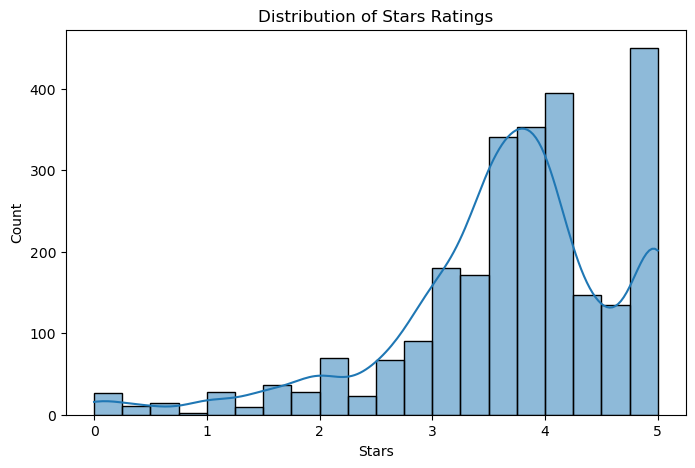

In [116]:
plt.figure(figsize=(8,5))
sns.histplot(y, bins=20, kde=True)
plt.title('Distribution of Stars Ratings')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.show()

In [121]:
df['Stars_class'] = df['Stars'].round().astype(int)

X = df.drop(columns=['Stars', 'Stars_class'])
y = df['Stars_class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        46
           3       0.31      0.06      0.10        83
           4       0.59      0.95      0.72       291
           5       0.71      0.24      0.36        83

    accuracy                           0.58       516
   macro avg       0.27      0.21      0.20       516
weighted avg       0.50      0.58      0.48       516



/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
"""
    From the experiment we can see that we did both feature extraction and also trained both regressor and a classifier on it.
"""